In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision.datasets
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import os

import torch, os
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 12)

In [86]:
"""
load tinyimage net dataset and return 

Parameters:
----------
data_folder: directory to tiny imagenet
size: the pixel size for each image
batch_size: number of images per batch
num_works: set # of works simultaneously inputting data
----------

Returns:
----------
data_loader: returns pytorch object of the respective three datasets, 'train', 'val', and 'test'
dataset_sizes: returns dict of sizes
classes: returns list of all used in label IDs
----------

"""
def load_data(data_folder = '', size = 150, batch_size = 32, num_workers = 8):
    data_transforms = {
        'train': transforms.Compose([
            transforms.CenterCrop(size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]),
        'val': transforms.Compose([
            transforms.CenterCrop(size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]),
        'test': transforms.Compose([
            transforms.CenterCrop(size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
    }

    imagenets = {
        'train': ImageFolder(data_folder + '\\train', transform=data_transforms['train']),
        'val': ImageFolder(data_folder + '\\val', transform=data_transforms['val']),
        'test': ImageFolder(data_folder + '\\test', transform=data_transforms['test'])
    }

    data_loader = {
        x: torch.utils.data.DataLoader(imagenets[x],
                                       batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=num_workers) for x in ['train', 'val', 'test']
    }
    dataset_sizes = {x: len(imagenets[x]) for x in ['train', 'val', 'test']}
    print('Datasets Loaded')
    classes = imagenets['train'].classes
    return data_loader, dataset_sizes, classes

In [87]:
"""
load label IDs and match them with their description

Parameters:
----------
label_folder: directory to words.txt within the tiny imagenet directory
----------

Returns:
----------
labels_list: returns a list of just the descriptions of all IDs
labels_dict: returns dict of the list above, but matched with its ID
----------

"""
def load_labels(label_folder = ''):
    f = open(label_folder, "r")
    labels_dict = {}
    labels_list = []
    for line in f:
        split = line.split(maxsplit=1)
        label_id = split[0]
        label = split[1].rstrip()
        labels_dict[label_id] = label
        labels_list.append(label)
    return labels_list, labels_dict

In [88]:
"""
Get label description based on index. Index number represents where it lies in 'classes' array. 
Using a dict we can return a description rather than an ID.

Parameters:
----------
x: index in classes array, to be transformed to description
----------

Returns:
----------
label: returns a string of more than 1 word replacing the ID
----------

"""
def get_label(x):
    label = labels_dict[classes[x]]
    return label

In [89]:
"""
Denormalize our images due to our preprocessing early, and convert them to numpy arrays to be viewed using matplotlib.

Parameters:
----------
img: tensor object representing the image
title: caption/title of that specific image
----------
"""
def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std*img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) #Pause is necessary to display images correctly

In [90]:
data,sizes,classes = load_data('E:\\Data\\tiny-imagenet-200')
data

Datasets Loaded


{'train': <torch.utils.data.dataloader.DataLoader at 0x1371e383c18>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x1371e45e128>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1371e45e0f0>}

In [91]:
labels_list, labels_dict = load_labels("E:\Data\\tiny-imagenet-200\\words.txt")
print(labels_list[1:4])

['physical entity', 'abstraction, abstract entity', 'thing']


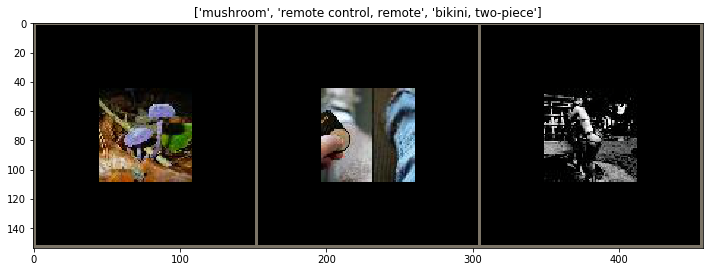

In [92]:
# Get a batch of training data
inputs, labels_id = next(iter(data['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs[0:3], nrow = 3)

imshow(out, title=[get_label(x) for x in labels_id[0:3]])